# Corporate Sector Clustering

## Introduction

INTRODUCTION OF THE PROJECT

In [36]:
# import
import pandas as pd
import numpy as np
import seaborn as sns

from scipy.spatial import distance 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 

# convert date 
from datetime import datetime

import matplotlib.pyplot as plt

In [28]:
# import data
corporate_pd = pd.read_csv("../corporate_rating.csv")
corporate_pd.head()

Index(['Rating', 'Name', 'Symbol', 'Rating Agency Name', 'Date', 'Sector',
       'currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding',
       'netProfitMargin', 'pretaxProfitMargin', 'grossProfitMargin',
       'operatingProfitMargin', 'returnOnAssets', 'returnOnCapitalEmployed',
       'returnOnEquity', 'assetTurnover', 'fixedAssetTurnover',
       'debtEquityRatio', 'debtRatio', 'effectiveTaxRate',
       'freeCashFlowOperatingCashFlowRatio', 'freeCashFlowPerShare',
       'cashPerShare', 'companyEquityMultiplier', 'ebitPerRevenue',
       'enterpriseValueMultiple', 'operatingCashFlowPerShare',
       'operatingCashFlowSalesRatio', 'payablesTurnover'],
      dtype='object')


,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


INTRODUCE THE COLUMN NAMES

To perform PCA dimension reduction in order to visualize the data in 2D, we keep the numerical variables within the dataset.

In [81]:
corporate_np = corporate_pd.drop(['Rating','Name','Symbol','Rating Agency Name','Date','Sector'],axis = 1).to_numpy()
sectors = corporate_pd[['Sector']].to_numpy()
# # convert the date into date format
# for i in range(corporate_np.shape[0]):
#     corporate_np[i,2] = datetime.strptime(corporate_np[i,2], '%m/%d/%Y').date()
corporate_np.shape

(2029, 25)

In [82]:
# zero-center the data adapted from lab 5 code
def standardize(data):
    data_std = data.copy()
    
    mean_vec = np.mean(data, axis=0)
    sd_vec = np.std(data, axis=0)
    
    for i in range(data.shape[1]):
        data_std[:,i] = (data[:,i] - mean_vec[i]*np.ones(data.shape[0]))/sd_vec[i]

    return data_std


(2029, 1)

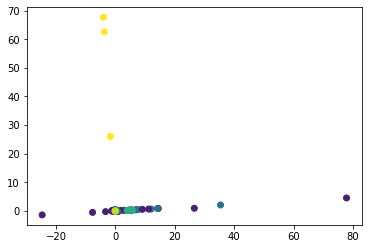

In [110]:
# standardize the data
corporate_std = standardize(corporate_np)

# visualize the data in 2D
pca = PCA(n_components=2)
corporate2D = pca.fit_transform(corporate_std)

sectorlist = list(sector.Sector.unique())
sector_num = sectors.copy()
for i in range(len(sectors)):
    sector_num[i] = sectorlist.index(sectors[i])

plt.scatter(corporate2D[:,0], corporate2D[:,1], c=sector_num)

The visualization of the original data is not so ideal given that there are extreme outliers within the data. Although most of the data are within 10 standard deviations from the mean, there are still some outliers that make it hard to see the number of clusters. Therefore we want to create an updated visualization without the outliers and more focused on the center cluster. Here we choose to keep data points that have -0.2 < x < 0.2  and y < 1.

In [142]:
# keep data points with x < 0.5
include = corporate2D[:,0]<0.5
corporate2Dnew = corporate2D[include]
sector_num1 = sector_num[include]

# keep data points with x > -0.5
include1 = corporate2Dnew[:,0]>-0.5
corporate2Dnew1 = corporate2Dnew[include1]
sector_num2 = sector_num1[include1]

# keep data points with y < 1
include2 = corporate2Dnew1[:,1]<1
corporate2Dnew2 = corporate2Dnew1[include2]
sector_num3 = sector_num2[include2]

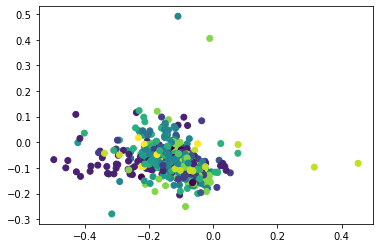

In [143]:
plt.scatter(corporate2Dnew2[:,0], corporate2Dnew2[:,1], c=sector_num3)

After zooming in towards the center, it seems that there are about 1-2 clusters within the data. However, the usual convention is to split the economy into [4 sectors](https://www.investopedia.com/ask/answers/05/industrysector.asp). 

- Primary Sector: This sector deals with the extraction and harvesting of natural resources such as agriculture and mining.
- Secondary Sector: This sector comprises construction, manufacturing, and processing. Basically, this sector comprises industries that relate to the production of finished goods from raw materials.
- Tertiary Sector: Retailers, entertainment, and financial companies make up this sector. These companies provide services to consumers.
- Quaternary Sector: The final sector deals with knowledge or intellectual pursuits including research and development (R&D), business, consulting services, and education.

We will implement k-means from scratch and explore the number of clusters.

## Self-implementation of k-means

## Implementing k-means with sklearn

## Self-implementation v.s. sklearn

## The optimal number of clusters using elbowology

## Cluters and discussions

## Spectural Clustering